In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras import  layers, models
import matplotlib.pylab as plt
from glob import glob
import numpy as np

In [2]:
fake_images_train = glob("Dataset/Train/Fake/fake_[12][0-9][0-9][0-9].jpg")
real_images_train = glob("Dataset/Train/Real/real_[12][0-9][0-9][0-9].jpg")
fake_images_test = glob("Dataset/Train/Fake/fake_[6][0-9][0-9][0-9].jpg")
real_images_test = glob("Dataset/Train/Real/real_[6][0-9][0-9][0-9].jpg")

In [7]:
len(fake_images_train) ,len(real_images_train),len(fake_images_test) , len(real_images_test)

NameError: name 'fake_images_train' is not defined

In [4]:
X_train = fake_images_train + real_images_train

In [5]:
X_test = fake_images_test + real_images_test

In [6]:
Y_train = np.array([0]*len(fake_images_train) + [1] * len(real_images_train))


In [7]:
Y_test = np.array([0]*len(fake_images_test) + [1] * len(real_images_test))

In [8]:
for i in range(len(X_train)):
    X_train[i] = cv2.cvtColor(cv2.imread(X_train[i]),cv2.COLOR_BGR2RGB)

In [9]:
for i in range(len(X_test)):
    X_test[i] = cv2.cvtColor(cv2.imread(X_test[i]),cv2.COLOR_BGR2RGB)

In [10]:
X_train = np.array(X_train)

In [11]:
X_test = np.array(X_test)

In [12]:
X_train = X_train / 255

In [13]:
X_test = X_test / 255

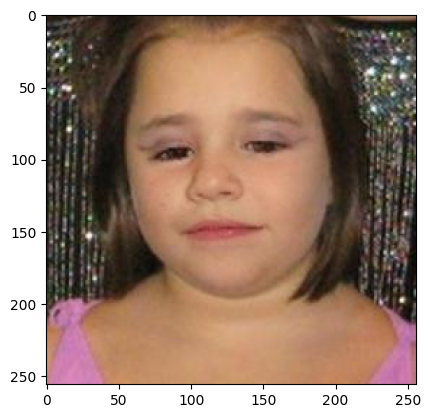

In [14]:
plt.imshow(X_train[500])

In [4]:
ann = models.Sequential([
    layers.Flatten(input_shape = (256,256,3)),
    layers.Dense(600,activation = 'relu'),
    layers.Dense(200,activation = 'relu'),
    layers.Dense(2,activation = 'softmax')

])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

c:\Users\dines\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
ann.fit(X_train,Y_train, epochs= 5)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 257ms/step - accuracy: 0.5860 - loss: 1.7983
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - accuracy: 0.7869 - loss: 0.4707
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.8277 - loss: 0.4073
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - accuracy: 0.8462 - loss: 0.3829
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.8578 - loss: 0.3594


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = ann.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step


In [18]:
Y_pred

array([[0.33327067, 0.66672933],
       [0.15461421, 0.84538585],
       [0.07151012, 0.92848986],
       ...,
       [0.0310435 , 0.9689565 ],
       [0.18782447, 0.81217545],
       [0.02656473, 0.9734353 ]], dtype=float32)

In [19]:
Y_pred_result = [np.argmax(ele) for ele in Y_pred]

In [20]:
print(classification_report( Y_test, Y_pred_result ))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54      1000
           1       0.61      0.95      0.74      1000

    accuracy                           0.67      2000
   macro avg       0.74      0.67      0.64      2000
weighted avg       0.74      0.67      0.64      2000



In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')
])

cnn.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\komal\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
cnn.fit(X_train,Y_train,epochs=3)

Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 534ms/step - accuracy: 0.6648 - loss: 1.1427
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 523ms/step - accuracy: 0.8723 - loss: 0.3069
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 515ms/step - accuracy: 0.9047 - loss: 0.2355


In [23]:
Y_pred = cnn.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step


In [24]:
Y_pred

array([[0.61554056, 0.3844594 ],
       [0.56273174, 0.43726823],
       [0.18867835, 0.8113216 ],
       ...,
       [0.00522509, 0.99477494],
       [0.07914083, 0.92085916],
       [0.02404312, 0.97595686]], dtype=float32)

In [25]:
Y_pred_result = [np.argmax(ele) for ele in Y_pred]


In [26]:
print(classification_report( Y_test, Y_pred_result ))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63      1000
           1       0.65      0.93      0.76      1000

    accuracy                           0.71      2000
   macro avg       0.76      0.71      0.70      2000
weighted avg       0.76      0.71      0.70      2000



In [31]:
samp_test = cv2.cvtColor(cv2.imread("sample.jpg"),cv2.COLOR_BGR2RGB) 
#plt.imshow(samp_test)

samp_test = samp_test / 255

sample_output = cnn.predict(np.array([samp_test]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [32]:
Y_pred_result = [np.argmax(ele) for ele in sample_output]

In [33]:
Y_pred_result

[1]

In [6]:
ann_history = ann.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

# Plotting training/validation accuracy over epochs for ANN
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined